# Linear Regression ¶

Félicitations ! Vous venez d'obtenir un contrat de travail avec une société de commerce électronique basée à New York qui vend des vêtements en ligne, mais ils ont aussi des séances de style en magasin et de conseils sur les vêtements. Les clients viennent au magasin, ont des sessions/réunions avec un styliste personnel, puis ils peuvent rentrer chez eux et commander sur une application mobile ou un site Web pour les vêtements qu'ils veulent.

L'entreprise tente de décider si elle doit concentrer ses efforts sur son expérience en matière d'applications mobiles ou sur son site Web. Ils vous ont engagé à contrat pour les aider à comprendre ! Commençons !

Il suffit de suivre les étapes ci-dessous pour analyser les données

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Scikit Learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#afficher les images et graphes dans le notebook, spécifique à jupyter
%matplotlib inline

## Obtenir les données

Nous travaillerons avec le fichier csv des clients l'entreprise. Il contient notamment
    Moyenne Durée de la session : Séance moyenne des séances de conseils en magasin.
    Heure à l'App : Temps moyen passé sur l'application en minutes
    Temps sur le site Web : Temps moyen passé sur le site Web en minutes
    Durée de l'adhésion : Depuis combien d'années le client est membre.

Lire dans le fichier csv des clients dans un DataFrame appelé *customers*.

In [2]:
customers = pd.read_csv('../data/Ecommerce Customers')

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [5]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [6]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Explorons les données

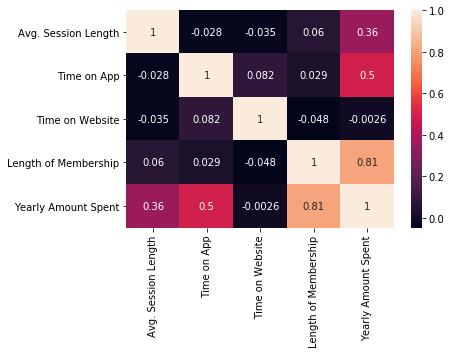

In [7]:
sns.heatmap(customers.corr(),annot=True)

## Explorons un peu plus les données

Utilisons seaborn pour creer un jointplot et comparons les colonnes "Time on Website" et "Yearly Amount Spent".
La corrélation a-t-elle un sens ?

/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


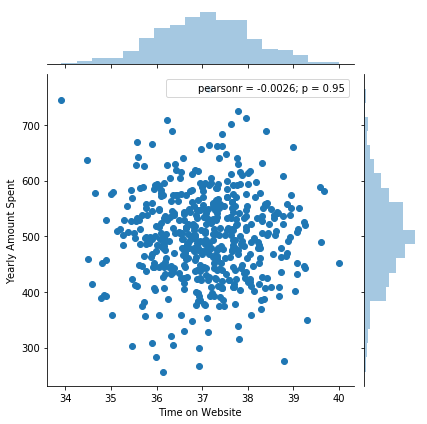

In [8]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

faisons la meme chose avec la colonne "Time on App"

/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


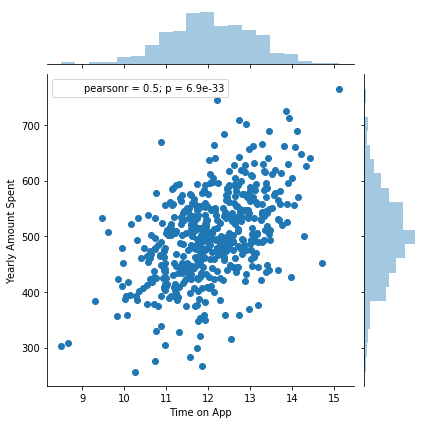

In [9]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers)

faisons la meme chose entre les colonnes "Time on App" et 'Length of Membership'

/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


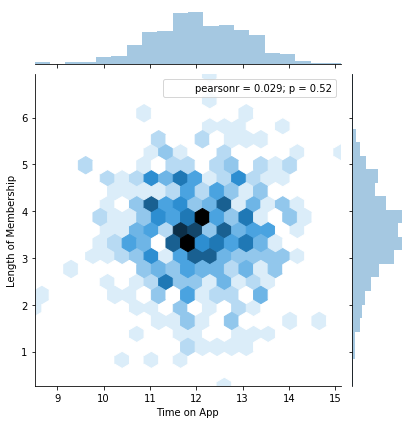

In [10]:
sns.jointplot(x='Time on App',y='Length of Membership',data=customers,kind='hex')

Explorons les corrélations entre les données, avec le pairplot seaborn

/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


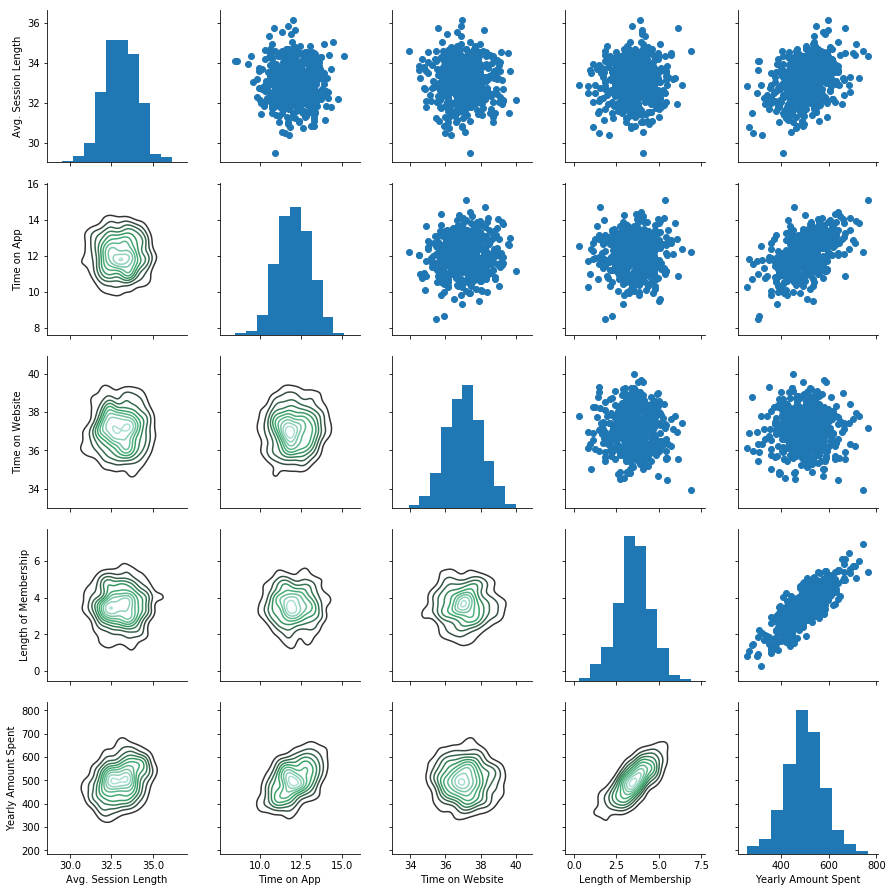

In [11]:
g = sns.PairGrid(customers)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

créons un modele lineaire avec lmplot seaborn entre Yearly Amount Spent et Length of Membership. 

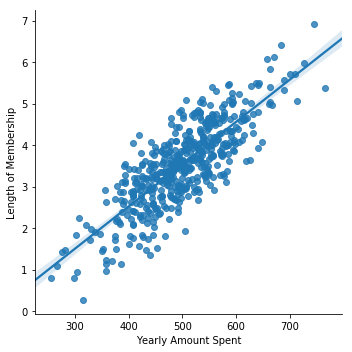

In [12]:
sns.lmplot(x='Yearly Amount Spent',y='Length of Membership',data=customers)

## Preparons notre jeu de données 

Maintenant que nous avons un peu exploré les données, allons de l'avant et divisons les données en ensembles de formation et d'essai. Définir une variable X égale aux caractéristiques numériques des clients et une variable y égale à la colonne "Yearly Amount Spent". 

In [13]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [14]:
#features
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

In [15]:
#target
y = customers['Yearly Amount Spent']

séparons notre training set et notre test set avec sklearn

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [17]:
len(X_train), len(X_test), len(y_train), len(y_test)

(350, 150, 350, 150)

## Entrainons notre premier modele

creons l'objet "lm" à partir de la classe "LinearRegression" de ScikitLearn

In [18]:
lm = LinearRegression()

appliquons la methode fit à notre objet = transfert de la connaissance issue des données

In [19]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
print(lm.intercept_), print(lm.coef_)

-1047.9327822502387
[25.98154972 38.59015875  0.19040528 61.27909654]


(None, None)

## Validons notre modele avec notre jeu de données de test

In [21]:
predict = lm.predict(X_test)

créons un graphe pour tester les valeurs prédites par rapport aux valeurs réelles

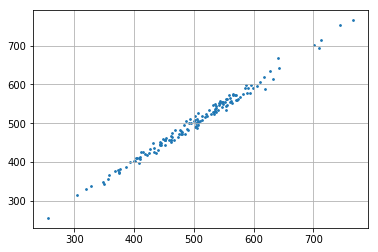

In [22]:
plt.scatter(y_test,predict,s=3)
plt.grid()

## Evaluons notre modele

Évaluons la performance de notre modèle en calculant la somme résiduelle des carrés et le score de variance expliqué (R^2).

In [23]:
model_eval = {'MAE':metrics.mean_absolute_error(y_test, predict),
              'MSE':metrics.mean_squared_error(y_test, predict),
              'RMSE':np.sqrt(metrics.mean_squared_error(y_test, predict))}

In [24]:
model_eval['MAE']

7.228148653430853

In [25]:
model_eval['MSE']

79.81305165097487

In [26]:
model_eval['RMSE']

8.933815066978656

## Résidus

Vous avez dû avoir un très bon modèle avec un bon ajustement. Examinons rapidement les résidus pour nous assurer que tout allait bien avec nos données.

Tracez un histogramme des résidus et assurez-vous qu'ils ont l'air normalement distribués. Utilisez soit seaborn distplot, soit simplement plt.hist().

/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


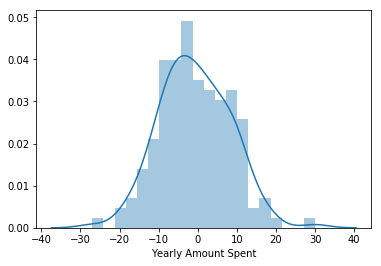

In [27]:
sns.distplot((y_test-predict),bins=20)

## Pensez-vous que l'entreprise devrait se concentrer davantage sur son application mobile ou sur son site Web ?